# Question 1

This problem is convex. The set w is a convex n-dimentional whole space. Obviously, all constraint functions are linear. The objective function x.T @ sigma @ x is a two-step matrix muptiplications which are nonnegative linear combinations of the convex set x. So this problem is convex.

# Question 2

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
coVar = np.array([[1,-0.003,0.02],[-0.003,1,-0.15],[0.02,-0.15,1]])
mu = np.array([0.02,0.003,0.07]).T
beta = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06])
one = np.ones(3)

In [3]:
startTime = datetime.datetime.now()
w = np.zeros((beta.shape[0],3))

for i in range(beta.shape[0]):
    W = cp.Variable(3)
    objective = cp.Minimize(W.T @ coVar @W)
    constraint1 = W >= 0
    constraint2 = W.T @ one == 1
    constraint3 = mu.T @ W >= beta[i]
    prob = cp.Problem(objective, constraints = [constraint1,constraint2,constraint3])
    result = prob.solve()
    w[i] = W.value
    if beta[i] == 0.01:
        print("The W* with beta 0.01 is: [%.4f, %.4f, %.4f]" % (W.value[0], W.value[1], W.value[2]))        
loopTime = (datetime.datetime.now() - startTime).total_seconds()
print("Processing time in seconds: %.4f" % loopTime)

The W* with beta 0.01 is: [0.2959, 0.3550, 0.3491]
Processing time in seconds: 0.0722


In [4]:
PortfolioExpectedReturn = w @ mu
PortfolioVolatility = np.sqrt([w[i] @ coVar @ w[i] for i in range(w.shape[0])])

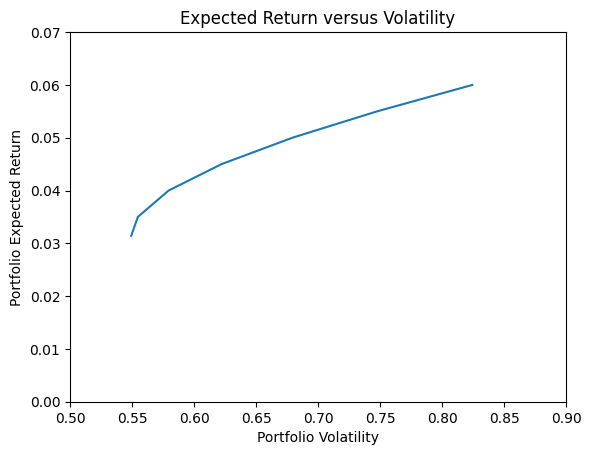

In [5]:
plt.plot(PortfolioVolatility,PortfolioExpectedReturn)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Expected Return')
plt.title('Expected Return versus Volatility')
plt.xlim(0.5, 0.9)
plt.ylim(0, 0.07)
plt.show()

# Question 3

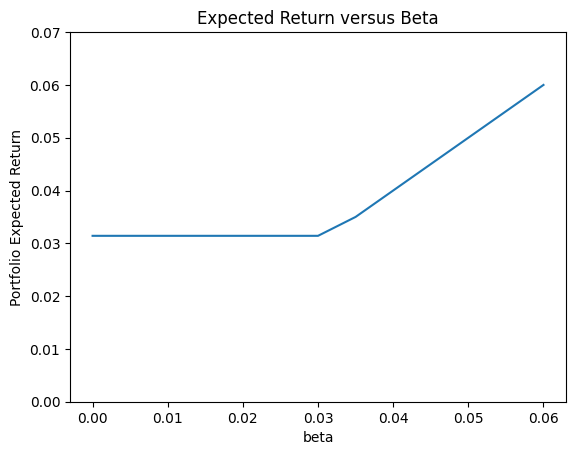

In [6]:
plt.plot(beta,PortfolioExpectedReturn)
plt.xlabel('beta')
plt.ylabel('Portfolio Expected Return')
plt.title('Expected Return versus Beta')
plt.ylim(0, 0.07)
plt.show()

For beta >= 0.035, the inequality constraint μ⊤w ≥ β is active. if β = 0.07, all money should be invested in the third stock which is the only stock giving a return 0.07. β > 0.07 is not achievable. 

# Question 4

In [7]:
startTime = datetime.datetime.now()
paraBeta = cp.Parameter()
W1 = cp.Variable(3)
objective = cp.Minimize(W1.T @ coVar @W1)
constraint1 = W1 >= 0
constraint2 = W1.T @ one == 1
constraint3 = mu.T @ W1 >= paraBeta
prob = cp.Problem(objective, constraints = [constraint1,constraint2,constraint3])

for i in range(beta.shape[0]):
    paraBeta.value = beta[i]
    prob.solve()
    if beta[i] == 0.01:
        print("The W* with beta 0.01 is: [%.4f, %.4f, %.4f]" % (W1.value[0], W1.value[1], W1.value[2]))      
    
paraTime = (datetime.datetime.now() - startTime).total_seconds()
print("Processing time in seconds: %.4f" % paraTime, end = ', ')
print("which is %.1f times faster than the first method with simple looping." % (loopTime / paraTime - 1))

The W* with beta 0.01 is: [0.2959, 0.3550, 0.3491]
Processing time in seconds: 0.0137, which is 4.3 times faster than the first method with simple looping.


# Question 5

In [8]:
beta1 = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06])
w1 = np.zeros((beta1.shape[0],3))
for i in range(beta1.shape[0]):
    W = cp.Variable(3)
    objective = cp.Minimize(W.T @ coVar @W)
    constraint1 = W >= 0
    constraint2 = W.T @ one == 1
    constraint3 = mu.T @ W == beta[i]
    prob = cp.Problem(objective, constraints = [constraint1,constraint2,constraint3])
    result = prob.solve()
    w1[i] = W.value
PortfolioVolatility1 = np.sqrt([w1[i] @ coVar @ w1[i] for i in range(w1.shape[0])])
PortfolioExpectedReturn1 = w1 @ mu

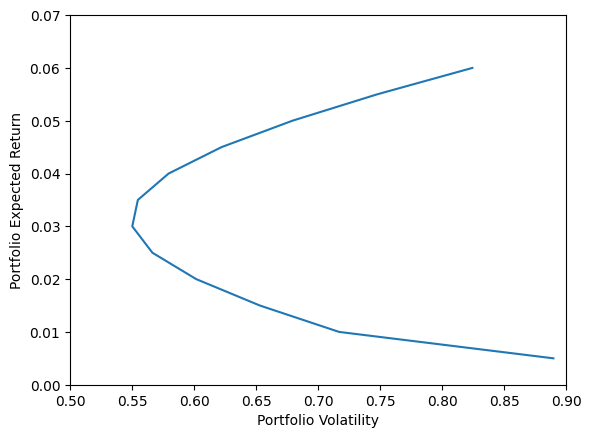

In [9]:
plt.plot(PortfolioVolatility1,PortfolioExpectedReturn1)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Expected Return')
plt.xlim(0.5, 0.9)
plt.ylim(0, 0.07)
plt.show()

The curve is different from that in Quesion 2 in the part when expected return is less than 0.035. When we set the equality μ⊤w=β, we have forced our forfolio to have an expected return equal to the beta required, even when there is better portforlio which give higher expected return without increasing volatility. The lower part of the plot above is dominated by the upper part which have higher expected return with the same volatility so the lower part will not be adopted in practice. 